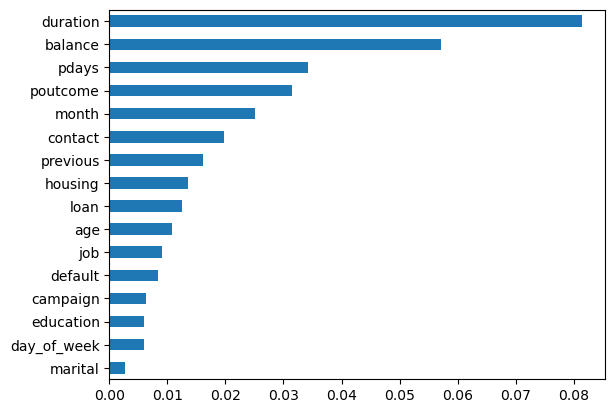

In [6]:
# project_copy is a snapshot of the full project code at the moment of this file's creation. 
# It contains cleaning and preprocessing steps to get our data model-ready
%run project_preprocessing.ipynb ;

# We are going to be testing logistic regression for three datasets:
# df2 - Data where missing values on 'job' and 'education' were imputed using other features in the data
# df3 - Data where all instances with missing values were deleted, at the cost of 2,018 observations
# oversampled_df - Data that underwent Weight of Evidence transformation and SMOTE

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('y',axis=1), 
                                                    df2['y'], test_size=0.30)

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
    'class_weight': ['balanced']
} 

rf = RandomForestClassifier()

grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3, cv = 3)

# Fit the random search object to the data
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('y',axis=1), 
                                                    df3['y'], test_size=0.30)

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
    'class_weight': ['balanced']
} 

rf = RandomForestClassifier()

grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3, cv = 3)

# Fit the random search object to the data
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[9270 2132]
 [ 342 1210]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     11402
           1       0.36      0.78      0.49      1552

    accuracy                           0.81     12954
   macro avg       0.66      0.80      0.69     12954
weighted avg       0.89      0.81      0.84     12954



c:\Users\ianpv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
X_train, X_test, y_train, y_test = train_test_split(oversampled_df.drop(['y', 'duration'], axis = 1), 
                                                    oversampled_df['y'], test_size=0.30)
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
} 

rf = RandomForestClassifier()

grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3, cv = 3)

# Fit the random search object to the data
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.766 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.750 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.739 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.745 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.744 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.739 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=100;, score=0.749 total time=   1.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=100;, score=0.747 total time=   1.0s
[CV 3/3] END max_depth=3, max_features=